## Gradient descent for  Linear regression 
Optimizing the process of updating weight and bias using Gradient descent. 

### Problem Statement
There are two data points: ,<br>
a house with 1000 sqft sold for $300,000 <br>
a house with 2000 sqft sold for $500,000 <br>
| Size (1000 sqft)     | Price (1000s of dollars) |
| ----------------| ------------------------ |
| 1               | 300                      |
| 2               | 500                      |

In [1]:
# Importing all the tools 
import numpy as np
import matplotlib.pyplot as plt
import math, copy 
from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients

In [3]:
# Loading datasets 
x_train=np.array([1.0,2.0])
y_train=np.array([300.0,500.0])

In [4]:
#Calculating the cost 
def compute_cost(x,y,w,b):
    m=x.shape[0]
    cost=0
    for i in range(m):
        f_wb=(w*x[i]+b)
        cost=cost+(f_wb-y[i])**2
    total_cost=1/(2*m)*(cost)
    return total_cost

#### Gradient descent summary 
We have a linear regression model that can predict $f_{w,b}(x^{(i)})$:
$$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$
<br>
Here, we utilized the training data to fit our parameters $w$, $b$ by minimizing the error between our predictions f_wb[i] and actual value y[i]. The measure is called cost, $J(w,b)$. Here, we calculated the total_cost over all training samples x[i],y[i]. <br>

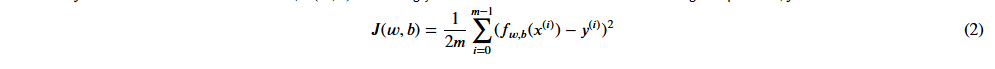 <br>
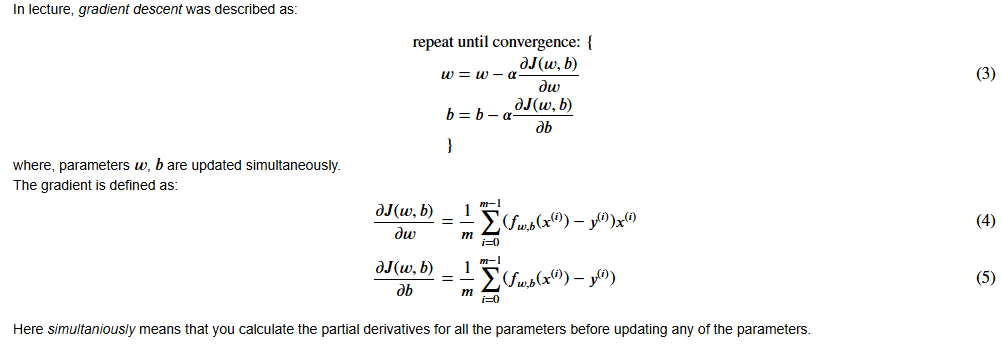

<a name="toc_40291_2.2"></a>
## Implement Gradient Descent
You will implement gradient descent algorithm for one feature. You will need three functions. 
- `compute_gradient` implementing equation (4) and (5) above
- `compute_cost` implementing equation (2) above (code from previous lab)
- `gradient_descent`, utilizing compute_gradient and compute_cost

Conventions:
- The naming of python variables containing partial derivatives follows this pattern,$\frac{\partial J(w,b)}{\partial b}$  will be `dj_db`.
- w.r.t is With Respect To, as in partial derivative of $J(wb)$ With Respect To $b$.


In [5]:
# compute_gradient returns the partial derivatives 

def compute_gradient(x,y,w,b):
    m=x.shape[0]
    dj_dw=0
    dj_db=0
    for i in range(m):
        f_wb=(w*x[i])+b
        dj_dw_i=(f_wb-y[i])*x[i]
        dj_db_i=(f_wb-y[i])
        dj_dw_i+=dj_dw_i
        dj_db_i+=dj_db_i
    dj_dw=(dj_dw_i)/m 
    dj_db=(dj_db_i)/m 
    return dj_dw,dj_db

    


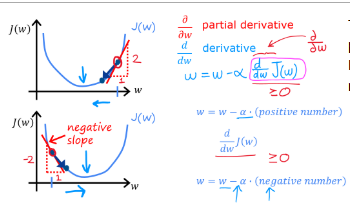 <br>

The partial derivatives are very important to update w and b. 
<br>


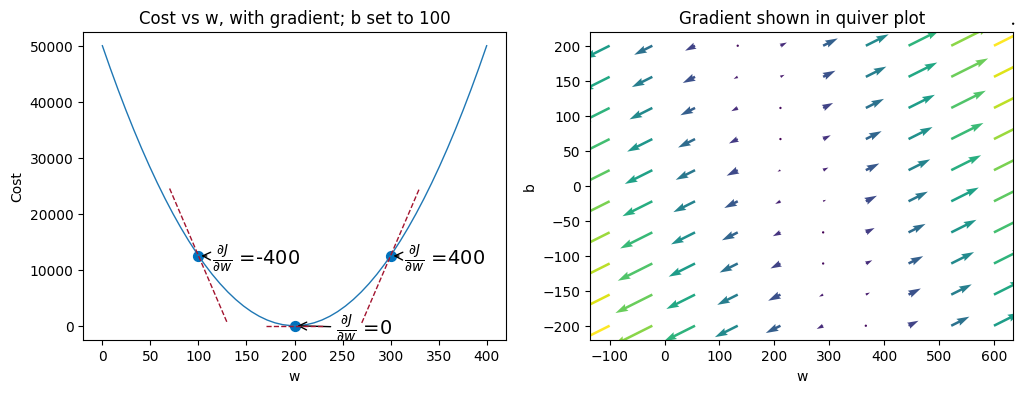

In [6]:
plt_gradients(x_train,y_train, compute_cost, compute_gradient)
plt.show()

Above, the left plot shows $\frac{\partial J(w,b)}{\partial w}$ or the slope of the cost curve relative to $w$ at three points. On the right side of the plot, the derivative is positive, while on the left it is negative. Due to the 'bowl shape', the derivatives will always lead gradient descent toward the bottom where the gradient is zero.
 
The left plot has fixed $b=100$. Gradient descent will utilize both $\frac{\partial J(w,b)}{\partial w}$ and $\frac{\partial J(w,b)}{\partial b}$ to update parameters. The 'quiver plot' on the right provides a means of viewing the gradient of both parameters. The arrow sizes reflect the magnitude of the gradient at that point. The direction and slope of the arrow reflects the ratio of $\frac{\partial J(w,b)}{\partial w}$ and $\frac{\partial J(w,b)}{\partial b}$ at that point.
Note that the gradient points *away* from the minimum. Review equation (3) above. The scaled gradient is *subtracted* from the current value of $w$ or $b$. This moves the parameter in a direction that will reduce cost.

### Gradient Descent
Now that gradients can be computed, gradient descent, described in equation (3) above can be implemented below in gradient_descent. The details of the implementation are described in the comments. Below, we will utilize this function to find optimal values of  𝑤
  and  𝑏
  on the training data.

In [7]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history #return w and J,w history for graphing

In [8]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 7.67e+04  dj_dw: -1.000e+03, dj_db: -5.000e+02   w:  1.000e+01, b: 5.00000e+00
Iteration 1000: Cost 1.68e-25  dj_dw: -1.364e-12, dj_db: -6.821e-13   w:  2.000e+02, b: 1.00000e+02
Iteration 2000: Cost 1.68e-25  dj_dw: -1.364e-12, dj_db: -6.821e-13   w:  2.000e+02, b: 1.00000e+02
Iteration 3000: Cost 1.68e-25  dj_dw: -1.364e-12, dj_db: -6.821e-13   w:  2.000e+02, b: 1.00000e+02
Iteration 4000: Cost 1.68e-25  dj_dw: -1.364e-12, dj_db: -6.821e-13   w:  2.000e+02, b: 1.00000e+02
Iteration 5000: Cost 1.68e-25  dj_dw: -1.364e-12, dj_db: -6.821e-13   w:  2.000e+02, b: 1.00000e+02
Iteration 6000: Cost 1.68e-25  dj_dw: -1.364e-12, dj_db: -6.821e-13   w:  2.000e+02, b: 1.00000e+02
Iteration 7000: Cost 1.68e-25  dj_dw: -1.364e-12, dj_db: -6.821e-13   w:  2.000e+02, b: 1.00000e+02
Iteration 8000: Cost 1.68e-25  dj_dw: -1.364e-12, dj_db: -6.821e-13   w:  2.000e+02, b: 1.00000e+02
Iteration 9000: Cost 1.68e-25  dj_dw: -1.364e-12, dj_db: -6.821e-13   w:  2.000e+02, b: 1.00000e+02


### Why it Likely Doesn't Overshoot (The Settings' Credit)
The reason the algorithm converges (and doesn't overshoot badly or diverge) in this specific execution is due to the value chosen for α:

tmp_alpha=1.0e-2(0.01)
This is a small, carefully selected value. For the simple linear regression problems used in these labs, a learning rate of 0.01 is typically small enough to guarantee stable convergence. It ensures the steps are gradual enough to consistently move downhill toward the minimum without excessive oscillation or divergence.

### Cost versus iterations of gradient descent¶
A plot of cost versus iterations is a useful measure of progress in gradient descent. Cost should always decrease in successful runs. The change in cost is so rapid initially, it is useful to plot the initial decent on a different scale than the final descent. In the plots below, the scale of cost on the axes and the iteration step is given.

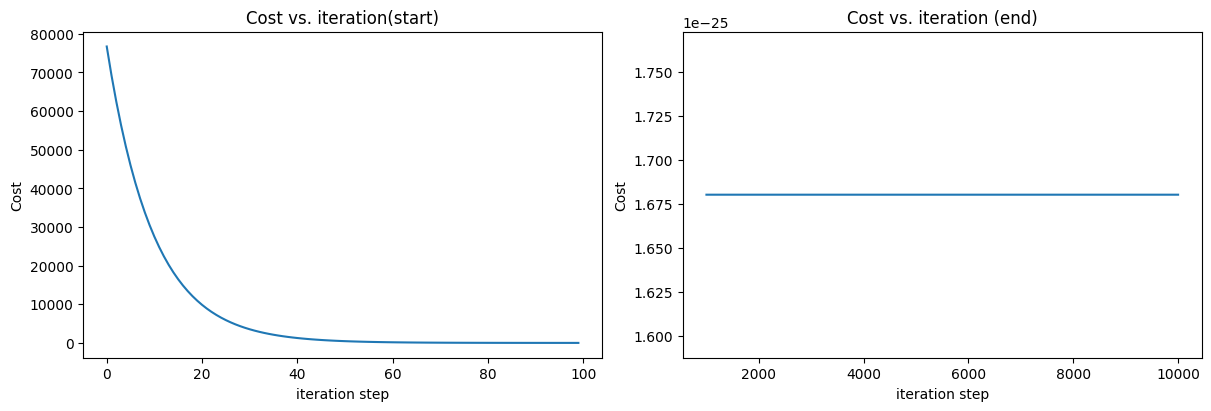

In [9]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

### Predictions 


In [11]:
print(f'final weight = {w_final} and final_bias = {b_final}\n')

final weight = 199.99999999999972 and final_bias = 99.99999999999986



In [10]:
print(f"1000 sqft house prediction {w_final*1.0 + b_final:0.1f} Thousand dollars")
print(f"1200 sqft house prediction {w_final*1.2 + b_final:0.1f} Thousand dollars")
print(f"2000 sqft house prediction {w_final*2.0 + b_final:0.1f} Thousand dollars")

1000 sqft house prediction 300.0 Thousand dollars
1200 sqft house prediction 340.0 Thousand dollars
2000 sqft house prediction 500.0 Thousand dollars


## Plotting
The progress of gradient descent during its execution by plotting the cost over iterations on a contour plot of the cost(w,b) is shown below:

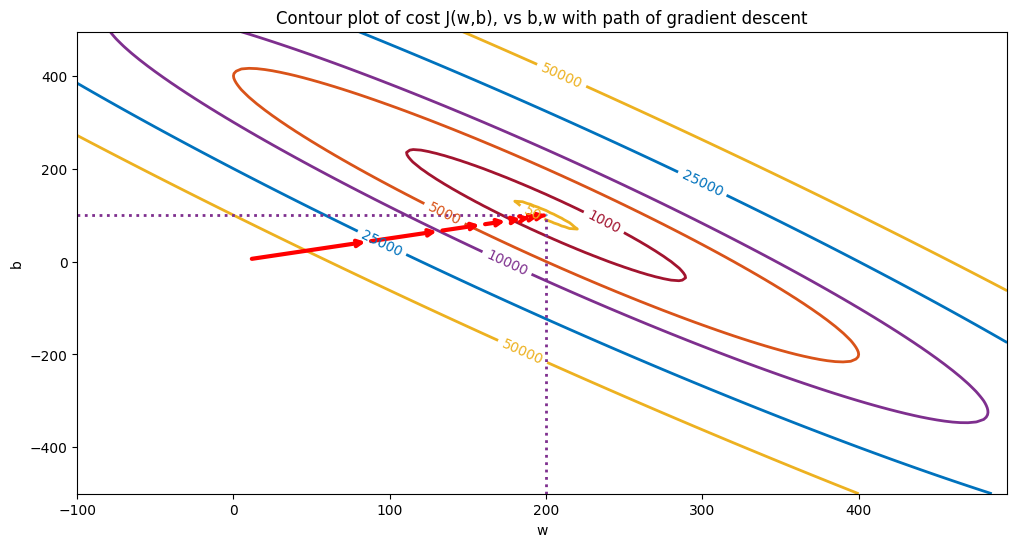

In [12]:
fig, ax = plt.subplots(1,1, figsize=(12, 6))
plt_contour_wgrad(x_train, y_train, p_hist, ax)

Above, the contour plot shows the  𝑐𝑜𝑠𝑡(𝑤,𝑏)
  over a range of  𝑤
  and  𝑏
 . Cost levels are represented by the rings. Overlayed, using red arrows, is the path of gradient descent. Here are some things to note:

The path makes steady (monotonic) progress toward its goal.
initial steps are much larger than the steps near the goal.
Zooming in, we can see that final steps of gradient descent. Note the distance between steps shrinks as the gradient approaches zero.

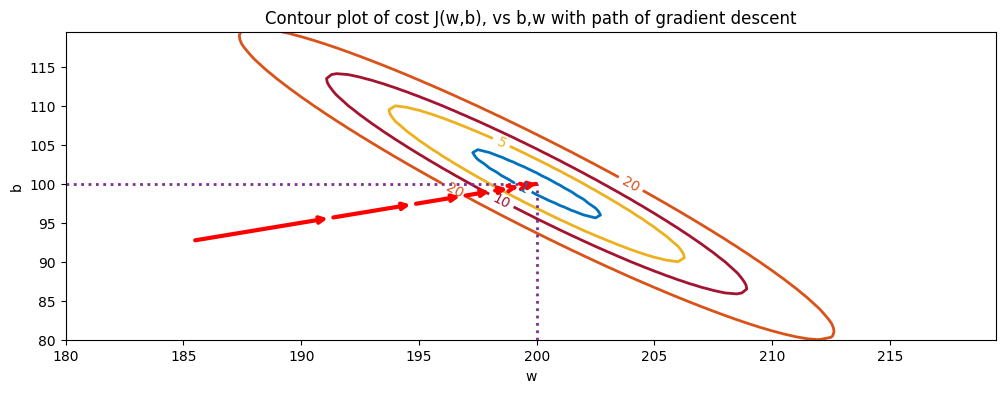

In [13]:
fig, ax = plt.subplots(1,1, figsize=(12, 4))
plt_contour_wgrad(x_train, y_train, p_hist, ax, w_range=[180, 220, 0.5], b_range=[80, 120, 0.5],
            contours=[1,5,10,20],resolution=0.5)

### Why Overshooting is Possible (The Code's Fault)
The code uses the standard Gradient Descent update rule: <br>
w←w−α⋅ ∂w∂J
​
If the learning rate tmp_alpha (set to 1.0e−2) were too high for the given data, the calculated step size (α⋅ ∂w∂J) would be too large, causing the algorithm to jump over the minimum and diverge (cost increasing).

The larger  𝛼 is, the faster gradient descent will converge to a solution. But, if it is too large, gradient descent will diverge. Above you have an example of a solution which converges nicely.
Now just increasing the value of  𝛼 to see what happens:<br>
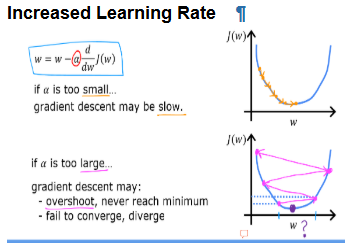

In [14]:
# initialize parameters
w_init = 0
b_init = 0
# set alpha to a large value
iterations = 10
tmp_alpha = 8.0e-1
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)

Iteration    0: Cost 7.65e+05  dj_dw: -1.000e+03, dj_db: -5.000e+02   w:  8.000e+02, b: 4.00000e+02
Iteration    1: Cost 6.88e+06  dj_dw:  3.000e+03, dj_db:  1.500e+03   w: -1.600e+03, b:-8.00000e+02
Iteration    2: Cost 6.20e+07  dj_dw: -9.000e+03, dj_db: -4.500e+03   w:  5.600e+03, b: 2.80000e+03
Iteration    3: Cost 5.58e+08  dj_dw:  2.700e+04, dj_db:  1.350e+04   w: -1.600e+04, b:-8.00000e+03
Iteration    4: Cost 5.02e+09  dj_dw: -8.100e+04, dj_db: -4.050e+04   w:  4.880e+04, b: 2.44000e+04
Iteration    5: Cost 4.52e+10  dj_dw:  2.430e+05, dj_db:  1.215e+05   w: -1.456e+05, b:-7.28000e+04
Iteration    6: Cost 4.07e+11  dj_dw: -7.290e+05, dj_db: -3.645e+05   w:  4.376e+05, b: 2.18800e+05
Iteration    7: Cost 3.66e+12  dj_dw:  2.187e+06, dj_db:  1.094e+06   w: -1.312e+06, b:-6.56000e+05
Iteration    8: Cost 3.29e+13  dj_dw: -6.561e+06, dj_db: -3.280e+06   w:  3.937e+06, b: 1.96840e+06
Iteration    9: Cost 2.96e+14  dj_dw:  1.968e+07, dj_db:  9.842e+06   w: -1.181e+07, b:-5.90480e+06


Above, $w$ and $b$ are bouncing back and forth between positive and negative with the absolute value increasing with each iteration. Further, each iteration $\frac{\partial J(w,b)}{\partial w}$ changes sign and cost is increasing rather than decreasing. This is a clear sign that the *learning rate is too large* and the solution is diverging. 
Visualizing this with a plot.

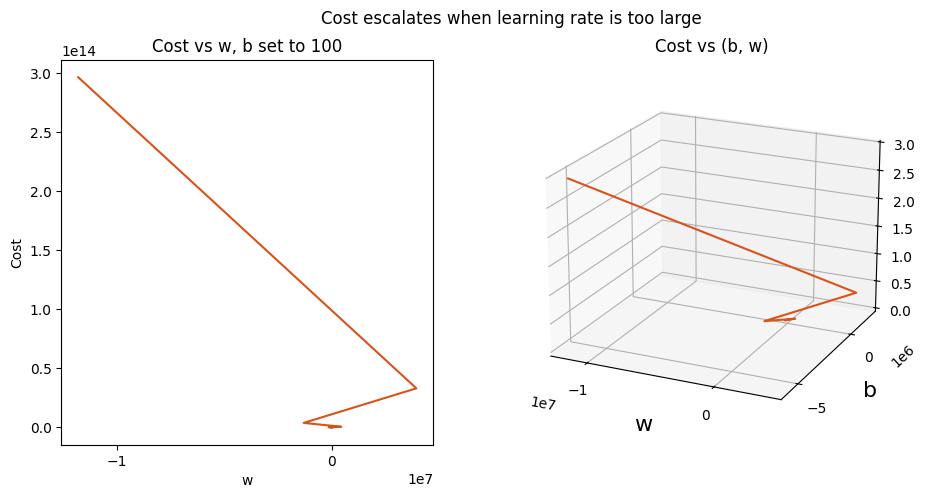

In [15]:
plt_divergence(p_hist, J_hist,x_train, y_train)
plt.show()